# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module II:** Value Risk
#### Topic:  Time Series *ARCH/GARCH* and *LSTM*.

##### Name: Julio César Avila Torreblanca

- **Objective**: apply ARCH and GARCH problem to a time series analysis.

- **Contents**:
    - Notes:
        - ARCH/GARCH/LSTM Algorithm
    - Code:
        1. Libraries and parameters
        2. Read Data
        3. EDA
        4. Modeling
        5. Evaluation
----

# Class Notes: Time Series Analysis with ARCH, GARCH, and LSTM Models

## Volatility Modeling with ARCH and GARCH

### ARCH Models

#### Basic Concept

The AutoRegressive Conditional Heteroskedasticity (ARCH) model is designed to model time-varying volatility in time series data by using past squared observations to predict current variance.

#### Mathematical Formulation

An ARCH(p) model is given by:

- **Error Term**:
  $$
  \epsilon_t = \sigma_t w_t
 $$
  where $w_t$ is white noise.

- **Volatility (Variance) Equation**:
  $$
  \sigma^2_t = \alpha_0 + \alpha_1 \epsilon^2_{t-1} + \ldots + \alpha_p \epsilon^2_{t-p}
  $$

- **Assumptions**:
  - **Stationarity**: The series should be stationary in mean, meaning that the statistical properties do not change over time.
  - **No Autocorrelation in Errors**: Residuals should not show autocorrelation.
  - **Normality of Errors**: The error terms are assumed to be normally distributed.

#### Advantages and Disadvantages

- **Advantages**:
  - Suitable for capturing volatility clustering.
  - Relatively simple to implement.

- **Disadvantages**:
  - Requires large datasets for complex models.
  - May not perform well if assumptions are violated.



### GARCH Models

#### Basic Concept

The Generalized ARCH (GARCH) model extends ARCH by including past conditional variances, offering a more comprehensive approach to forecasting volatility.

#### Mathematical Formulation

A GARCH(p, q) model's variance equation is:

$$
\sigma^2_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon^2_{t-i} + \sum_{j=1}^{q} \beta_j \sigma^2_{t-j}
$$

#### Advantages and Disadvantages

- **Advantages**:
  - Captures both short-term and long-term volatility.
  - Generally provides better forecast accuracy than simple ARCH.

- **Disadvantages**:
  - More computationally intensive.
  - Sensitivity to model specification and initial values.

## Long Short-Term Memory (LSTM) Networks

### Introduction

LSTM networks are a type of recurrent neural network (RNN) designed to learn from sequences of data with long-range dependencies. They are particularly effective in handling time series data with complex temporal structures.

### How LSTMs Work

LSTMs have a specialized architecture that includes a memory cell, along with input, output, and forget gates. These components allow the network to retain information over extended sequences without succumbing to the vanishing gradient problem typical in standard RNNs.

### Applications in Time Series

- **Financial Forecasting**: LSTMs can be used to predict stock prices, interest rates, and other financial indicators.
- **Anomaly Detection**: Suitable for identifying unusual patterns indicative of fraud or other financial risks.

### Advantages and Disadvantages

- **Advantages**:
  - Ability to remember long-term dependencies makes LSTMs powerful for sequence prediction.
  - Flexibility in modeling complex temporal relationships.

- **Disadvantages**:
  - Requires large amounts of data and computational resources.
  - Interpretability can be challenging compared to simpler models.

---

# 1. Librerías y parámetros

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt

# 2. Sintetic Data Generation

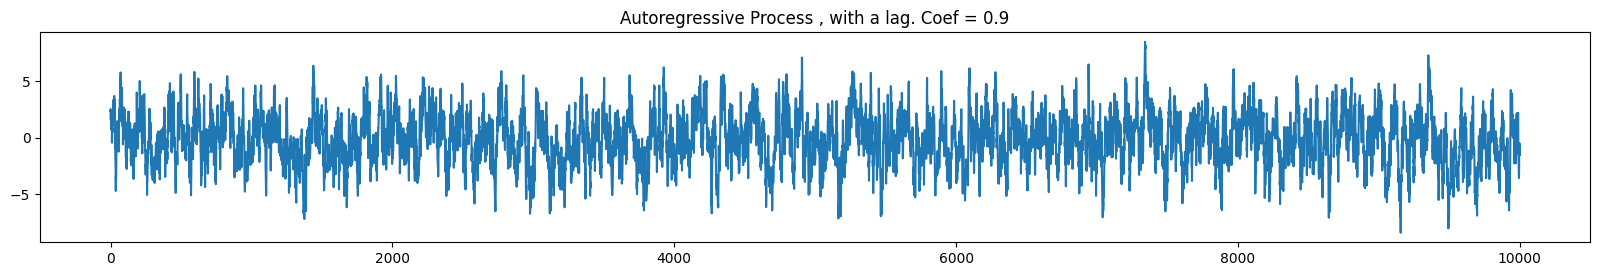

In [4]:
coef = 0.9
plt.subplot(2,1,1)
ar = np.array([1, -0.9])
ma = np.array([1])

titulo = 'Autoregressive Process , with a lag. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=10000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

# 3. LSTM

## 3.1 Data Preprocessing

In [5]:
datos_cortados = np.empty((1,2,1))
y = np.empty((1,))
for element in AR_simulacion.index[:-3]:
  muestra = np.array([[[AR_simulacion[element]], [AR_simulacion[element + 1]]]])
  datos_cortados = np.append(datos_cortados, muestra, axis=0)

  y = np.append(y, AR_simulacion[element + 2])

  # SALIDA TIENE QUE SER (x, 2, 1)

In [10]:
AR_simulacion

,0
0,2.330707
1,2.515656
2,1.553563
3,2.422129
4,0.885257
...,...
9995,-3.115885
9996,-1.143580
9997,-1.532076
9998,-0.512073


In [13]:
datos_cortados[9997]

array([[-1.14357961],
       [-1.53207591]])

In [14]:
y[9997]

-0.5120731481931807

In [9]:
AR_simulacion.shape

(10000,)

In [8]:
datos_cortados.shape

(9998, 2, 1)

In [7]:
y.shape

(9998,)

In [15]:
train = datos_cortados[1:, :].copy()
target = y[1:].copy()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    train,
    target,
    shuffle=False,
    random_state=10,
    train_size=.90
)


## 3.2 First *Architecture*

### Definition

In [17]:
# Definicion de las capas
price_input = layers.Input(
    shape = (2, 1),
    name = 'price_input'
)

price_lstm = layers.LSTM(
    units=1,
    name = 'price',
    recurrent_activation='linear'
)

# Como se conectan las capas definidas arriba
price_output = price_lstm(price_input)

In [18]:
# Instanciación del objeto modelo
model = keras.Model(price_input, price_output)

model.compile(
    loss = 'mean_squared_error'
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ price_input (InputLayer)             │ (None, 2, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ price (LSTM)                         │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

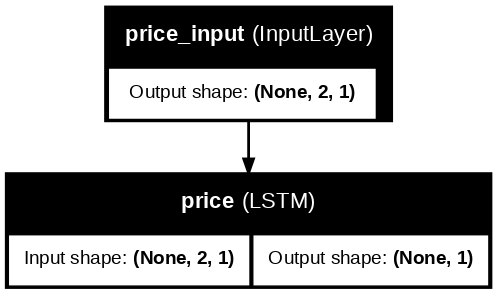

In [19]:
# Visualización del modelo
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

### Training

In [20]:
tf.random.set_seed(20)
np.random.seed(10)

In [21]:

history = model.fit(
    x_train, y_train,
    batch_size = 128,
    epochs = 100,  # Valor real de 1000
).history


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8009
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8272
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5345
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4029
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3021
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2210
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1644
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1279
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1023
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0832
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0690
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0582
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0499
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0434
Epoch 15/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0384
Epoc

### Test

In [22]:
### loss
x = list(range(len(history['loss'])))
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = history['loss']))

fig.show()

In [25]:
y_pred = model.predict(x_train)

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


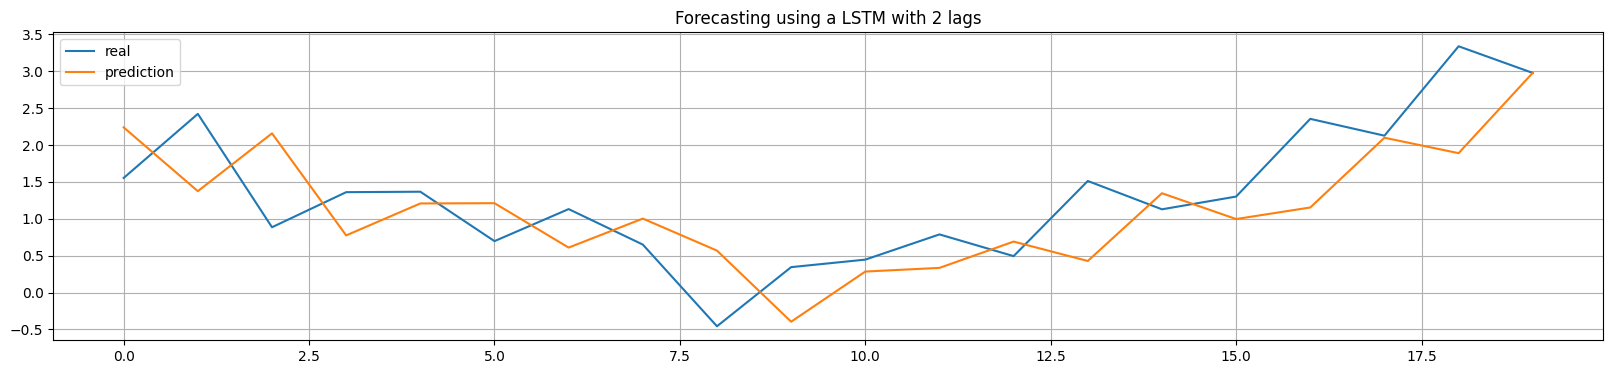

In [28]:
plt.title('Forecasting using a LSTM with 2 lags')
plt.plot(y_train[:20], label='real')
plt.plot(y_pred[:20], label='prediction')
plt.legend()
plt.grid()

In [29]:
model.get_weights()

[array([[-2.5933535,  0.6102757,  1.797445 , -0.8980817]], dtype=float32),
 array([[ 0.2156627 , -0.50184375,  0.7378647 ,  0.00443973]],
       dtype=float32),
 array([ 0.11918289,  1.3218049 , -0.06148219,  0.01095622], dtype=float32)]

# 4. Conclusions